# Detailed Example of Adaline Learning Process

Adaline stands for **ADA**ptive **LI**near **E**lement. It was proposed in the context of filtering and is an early single-layer artificial neural network. The difference between Adaline and the Perceptron is that in the learning phase, the weights are adjusted according to the weighted sum of the inputs. Check out the [original paper](https://www-isl.stanford.edu/~widrow/papers/c1960adaptiveswitching.pdf).


### References

- BRAGA, A.; CARVALHO, A. C. P. L. F.; LUDERMIR, T. B. (2011) Redes Neurais Artificiais – Teoria e Prática. Editora LTC, Section 3.2
- WIDROW, B.; HOFF, M. E. (1960) _Adaptive Switching Circuits_, IRE WESCON Convention Record, pp. 96-104.

### Implementation

- Elloá B. Guedes (ebgcosta@uea.edu.br)
- [github.com/elloa](github.com/elloa)


In [1]:
## Required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
#%matplotlib widget

## ADALINE Elements

In [2]:
# Outputs the weighted-sum of inputs
# Activation function is purelin, i.e., f(u) = u
def output(weights,sample):
    new = np.squeeze((sample).reshape(2,1))
    weights = np.squeeze(weights)
    return np.dot(weights,new)

In [3]:
# Error
def error(target,obtained):
    return target - obtained

In [4]:
# Mean Squared Error for the entire dataset
def mse(targets,inputs, weights):
    temp = []
    for x in inputs:
        temp.append(output(weights,x))
    
    s = 0
    for (x,y) in zip(targets,temp):
        s += (x-y)**2
    return s/len(targets)

## Practical Problem using ADALINE

This regression problem was chosen because it is possible to visualize in three dimensions

- Samples: 2
- Training Data: $\Gamma = \{(x_1 = 0.2; y_d^1 = 0.9), (x_2 = -1.5; y_d^2 = 0.3)\}$
- Input shape: (1,1)
- Output shape: (1,1)
- Learning rate: $\eta = 0.1$

In [5]:
inputs = np.array([[0.2],[-1.5]])
targets = np.array([[0.9],[0.3]])
SAMPLES = 2
LEARNING_RATE = 0.01

In [6]:
# Introduces a +1 dimension to deal with the polarization term
inputs = np.concatenate((np.ones((SAMPLES,1)),inputs),axis=1)

# Initial weight vector suggested in the second reference
# polarization term = 1.5, w0 = -1.5
w0 = np.array([1.5, -1.5])

it = 0
pos = 0
w0 = np.squeeze(w0)

## Learning Algorithm -- Delta Rule

### Cost Function (MSE)

\begin{equation}
J = \frac{1}{n}\sum_{i= 1}^{n} (y_d^i - (\mathbf{w}\mathbf{x}^i))^2
\end{equation}

### Recall that we have to update weights in order to minimize the cost function

\begin{eqnarray}
\frac{\partial J}{\partial w_i} &=& \frac{\partial J}{\partial y}\frac{\partial y}{\partial w_i}\\
&=& - x_i (d - (w_0 + w_1x_2 +\ ldots + w_n x_n))\\
&=& -x_i\cdot e
\end{eqnarray}

We have to walk in the opposite direction of the increase in the error gradient.

\begin{equation}
\Delta \mathbf{w}_i \propto - \nabla J
\end{equation}

So that:

\begin{equation}
\Delta \mathbf{w}_i \propto e x_i
\end{equation}

### Updating the weights vector

\begin{eqnarray}
W(n + 1) &=& W(n) + \Delta W(n)\\
         &=& W(n) + \eta \cdot e \cdot x_i
\end{eqnarray} where $\eta$ is the learning rate that gives us the size of the steps we walk in the error surface towards minimizing the MSE





In [7]:
values = []
errors = []
while (mse(targets,inputs,w0) > 10**(-8)):
    iteration_error = error(targets[pos],output(w0,inputs[pos]))
    
    ## Creating a list of weights and MSE at the current iteration    
    values.append(np.concatenate((w0, np.array(mse(targets,inputs,w0), dtype=np.float32))))
    
    errors.append(mse(targets,inputs,w0)[0])
    w1 = w0 + LEARNING_RATE*iteration_error*inputs[pos]    
    w1 = w1.squeeze()
    pos = (pos + 1) % 2
    w0 = w1
    it = it +1 
        
print("====== TRAINING RESULT ======")
print("First  sample: Ground truth", targets[0],"Predicted: ",output(inputs,w0)[0])
print("Second sample: Ground truth", targets[1],"Predicted: ",output(inputs,w0)[1])
print("Iterations: ",it)
print("Epochs: ",int(it/2))
print("Final weights vector:")
print(w0)

====== TRAINING RESULT ======
First  sample: Ground truth [0.9] Predicted:  0.8998644237132587
Second sample: Ground truth [0.3] Predicted:  0.3000394348011032
Iterations:  2011
Epochs:  1005
Final weights vector:
[0.82929678 0.35283823]


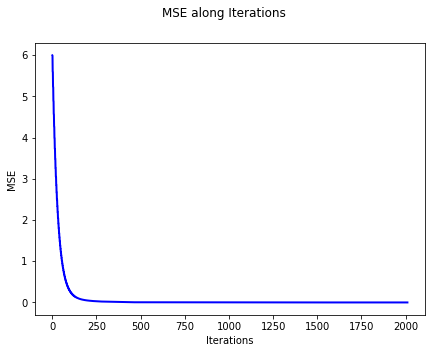

In [8]:
plt.figure(figsize=(7,5))
plt.suptitle("MSE along Iterations")
plt.plot(errors, color = "b", linewidth = 2)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show();

In [9]:
## Convert values to ndarray and saves in a file
values = np.stack(values)
filename = "triplets.txt"
np.savetxt(filename,values,delimiter=",",newline='\n')

In [10]:
## Open file
values = np.loadtxt("triplets.txt",delimiter=",")

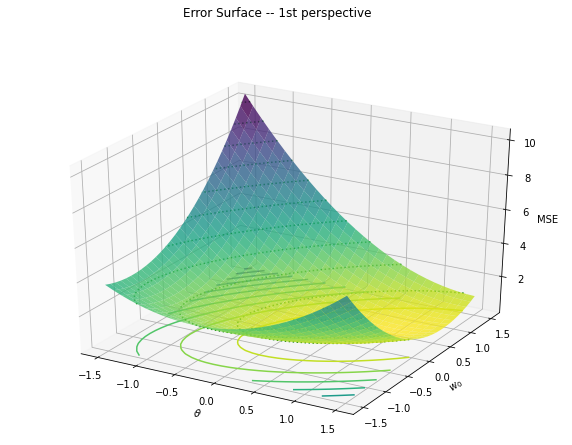

In [11]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
fig.suptitle("Error Surface -- 1st perspective")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$w_0$")
ax.set_zlabel(r"MSE")
X, Y = np.mgrid[-1.5:1.5:30j, -1.5:1.5:30j]
Z =  ((0.9 - (X + Y*0.2))**2 + (0.3 - (X + Y*(-1.5)))**2)/2
ax.plot_surface(X, Y, Z, cmap="viridis_r", rstride=1, cstride=1, alpha = 0.8)
ax.contour(X, Y, Z, 10, cmap="viridis_r", linestyles="solid", offset=-.08)
ax.contour(X, Y, Z, 10, colors="g", linestyles="dotted")
plt.show();

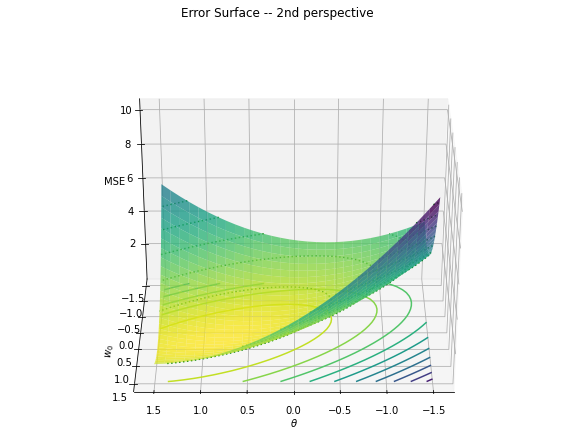

In [12]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
fig.suptitle("Error Surface -- 2nd perspective")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$w_0$")
ax.set_zlabel(r"MSE")
X, Y = np.mgrid[-1.5:1.5:30j, -1.5:1.5:30j]
Z =  ((0.9 - (X + Y*0.2))**2 + (0.3 - (X + Y*(-1.5)))**2)/2
ax.plot_surface(X, Y, Z, cmap="viridis_r", rstride=1, cstride=1, alpha = 0.8)
ax.contour(X, Y, Z, 10, cmap="viridis_r", linestyles="solid",offset=-.08)
ax.contour(X, Y, Z, 10, colors="g", linestyles="dotted")
ax.view_init(30, 90)
plt.show();

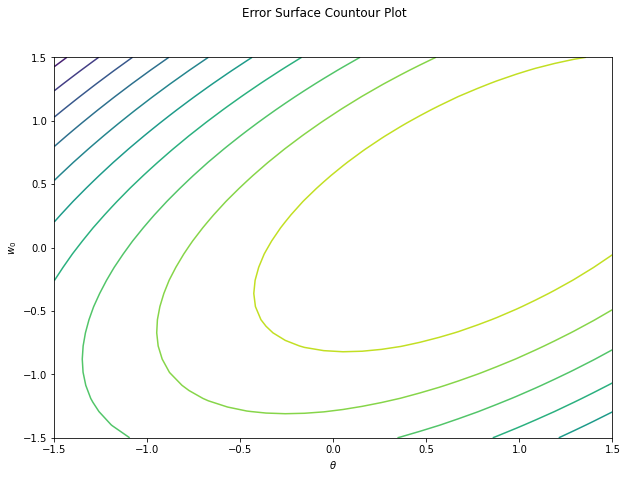

In [13]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
fig.suptitle("Error Surface Countour Plot")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$w_0$")
#ax.set_zlabel(r"MSE")
X, Y = np.mgrid[-1.5:1.5:30j, -1.5:1.5:30j]
Z =  ((0.9 - (X + Y*0.2))**2 + (0.3 - (X + Y*(-1.5)))**2)/2
ax.contour(X, Y, Z, 10, cmap="viridis_r", linestyles="solid")
plt.show();

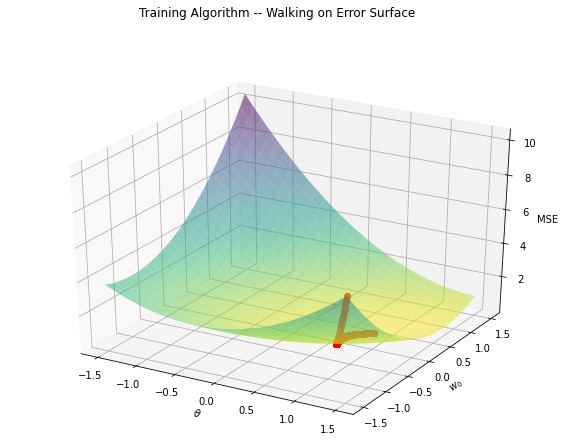

In [14]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
fig.suptitle("Training Algorithm -- Walking on Error Surface")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$w_0$")
ax.set_zlabel(r"MSE")
X, Y = np.mgrid[-1.5:1.5:30j, -1.5:1.5:30j]
Z =  ((0.9 - (X + Y*0.2))**2 + (0.3 - (X + Y*(-1.5)))**2)/2
ax.plot_surface(X, Y, Z, cmap="viridis_r", rstride=1, cstride=1, alpha = 0.5)
ax.plot(values[:,0], values[:,1], values[:,2], 'ro', alpha=0.7)
plt.show();


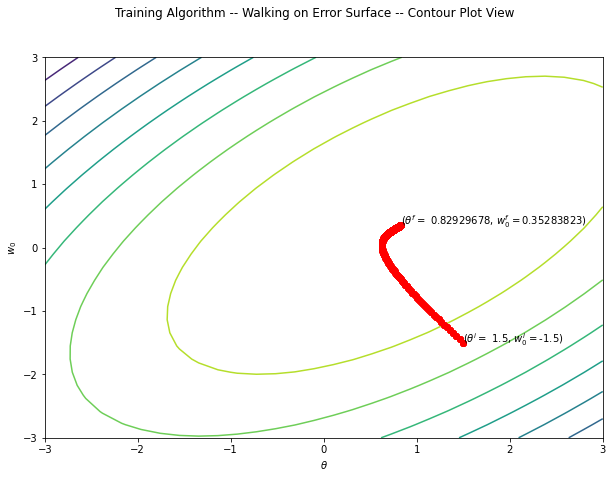

In [15]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
fig.suptitle(r"Training Algorithm -- Walking on Error Surface -- Contour Plot View")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$w_0$")

X, Y = np.mgrid[-3:3:30j, -3:3:30j]
Z =  ((0.9 - (X + Y*0.2))**2 + (0.3 - (X + Y*(-1.5)))**2)/2

xx = np.column_stack((values[:,0], values[:,0]))
yy = np.column_stack((values[:,1], values[:,1]))
ax.contour(X, Y, Z, 10, cmap="viridis_r", linestyles="solid")
#ax.plot([0.82929678],[0.35283823], "ro")
ax.plot(xx,yy,"ro")
ax.annotate(r'($\theta^f = $ %s, $w_0^f = $%s)' % (0.82929678,0.35283823), xy=(0.82929678,0.35283823), textcoords='data') 
ax.annotate(r'($\theta^i = $ %s, $w_0^i = $%s)' % (1.5, -1.5), xy=(1.5, -1.5), textcoords='data') 
plt.show()